<a href="https://colab.research.google.com/github/20130297-PhamHoangKhuong/PhamHoangKhuong/blob/main/Lab_4_20130297_PhamHoangKhuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks.

*   **Deadline: 23:59, 01/04/2024**



# Import libraries

In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [30]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

#Task 1.
Apply **LogisticRegression** to iris dataset to classify species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'.



```
from sklearn import datasets
data1 = datasets.load_iris()
```




In [3]:
# code
data1 = datasets.load_iris()
X = data1.data
y = data1.target
data1

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Accuracy :  1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


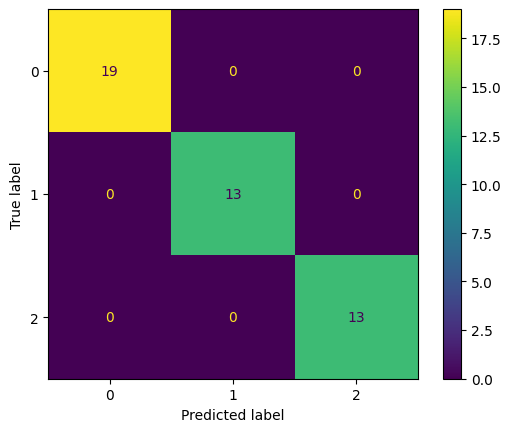

In [4]:
# code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print ("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",cm)


#Task 2.
Apply LogisticRegression to **FASHION** dataset (*fashion_train.csv* and *fashion_test.csv*) which aims at classifying 10 fashion categories. Dataset includes 784 pixels values of images (28x28). This pixel-value is an integer between 0 and 255. Each training and test example is assigned to one of the following labels:

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

In [5]:
# code
df = pd.read_csv("fashion_train.csv")
X = df.drop('y', axis=1)
y = df['y']
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,...,82,32,0,0,0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,0,0,0,0,0,0,0,0,4,...,0,0,0,5,8,9,2,0,0,9
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [6]:
# code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print ("Accuracy : ", accuracy_score(y_test, y_pred))

class_report = classification_report(y_test, y_pred)
print(class_report)

# In tên các nhãn
data = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("\nTên các nhãn:")
for i, name in enumerate(data):
    print(f"{i}: {name}")



Accuracy :  0.7833333333333333
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.96      0.93      0.95        29
           2       0.72      0.67      0.69        39
           3       0.78      0.91      0.84        35
           4       0.68      0.66      0.67        29
           5       0.92      0.74      0.82        31
           6       0.56      0.52      0.54        29
           7       0.77      0.77      0.77        22
           8       0.90      0.76      0.83        25
           9       0.79      0.96      0.87        27

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300


Tên các nhãn:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


In [7]:
# code
df = pd.read_csv("fashion_test.csv")
X = df.drop('y', axis=1)
y = df['y']
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,1,3,2,0,0,...,0,0,135,117,25,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,11,...,0,0,0,147,162,104,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,20,3,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,229,215,175,145,5,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
7,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,16,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,111,98,121,0,0,0,0,6


In [8]:
# code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print ("Accuracy : ", accuracy_score(y_test, y_pred))

class_report = classification_report(y_test, y_pred)
print(class_report)

# In tên các nhãn
data = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("\nTên các nhãn:")
for i, name in enumerate(data):
    print(f"{i}: {name}")


Accuracy :  0.7333333333333333
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        25
           1       0.96      0.86      0.91        29
           2       0.55      0.68      0.61        25
           3       0.69      0.74      0.71        34
           4       0.67      0.59      0.63        27
           5       0.81      0.73      0.77        30
           6       0.43      0.37      0.40        35
           7       0.90      0.84      0.87        32
           8       0.92      0.89      0.91        38
           9       0.80      0.96      0.87        25

    accuracy                           0.73       300
   macro avg       0.73      0.74      0.73       300
weighted avg       0.74      0.73      0.73       300


Tên các nhãn:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


#Task 3.
Apply another classification algorithm named **kNN**, which is an instance classifcation model.
*  3.1. Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: **accuracy, precision, recall, f1 measure**) using **PrettyTable**.


In [ ]:
# code

#Task 4.
Similar to Task 3, apply kNN algorithm to **FASHION** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.2.	Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.3.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [9]:
# code
data1 = datasets.load_iris()
X = data1.data
y = data1.target
data1

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
# code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

k_values = list(range(3, 30, 2))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

In [25]:
# code
best_index = accuracy_scores.index(max(accuracy_scores))

best_k = k_values[best_index]
best_accuracy = accuracy_scores[best_index]

print("Best k value:", best_k)
print("Accuracy with best k:", best_accuracy)

Best k value: 3
Accuracy with best k: 1.0


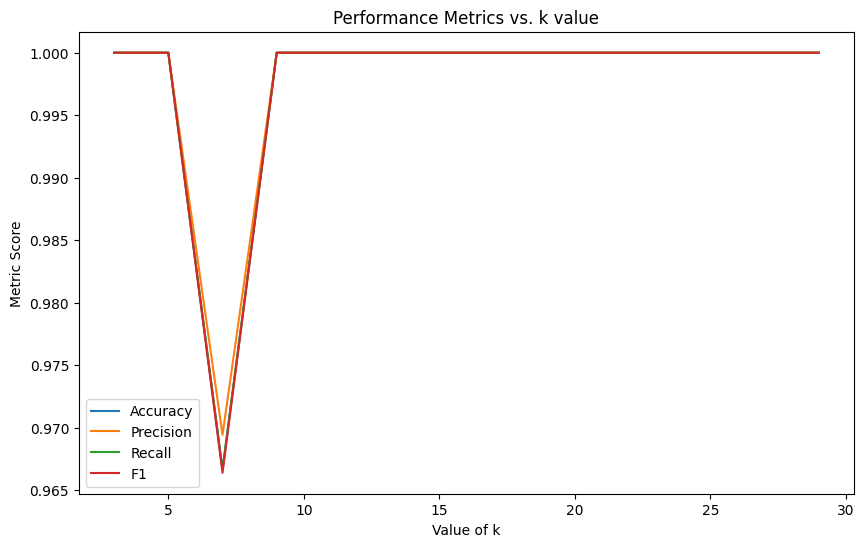

In [17]:
# code
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, f1_scores, label='F1')
plt.xlabel('Value of k')
plt.ylabel('Metric Score')
plt.title('Performance Metrics vs. k value')
plt.legend()
plt.show()

In [27]:
# code
comparison_table = PrettyTable()
comparison_table.field_names = ["Algorithm", "Best k/Parameter", "Accuracy", "Precision", "Recall", "F1"]

# Thêm kết quả kNN vào bảng
comparison_table.add_row(["kNN", best_k, accuracy_scores[best_index],
                          precision_scores[best_index], recall_scores[best_index], f1_scores[best_index]])

# Đào tạo hồi quy logistic và lấy số liệu của nó
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
logistic_accuracy = log_reg.score(X_test, y_test)
logistic_pred = log_reg.predict(X_test)
logistic_precision = precision_score(y_test, logistic_pred, average='weighted')
logistic_recall = recall_score(y_test, logistic_pred, average='weighted')
logistic_f1 = f1_score(y_test, logistic_pred, average='weighted')

# Thêm kết quả hồi quy logistic vào bảng
comparison_table.add_row(["Logistic Regression", "-", logistic_accuracy,
                          logistic_precision, logistic_recall, logistic_f1])

print(comparison_table)

+---------------------+------------------+----------+-----------+--------+-----+
|      Algorithm      | Best k/Parameter | Accuracy | Precision | Recall |  F1 |
+---------------------+------------------+----------+-----------+--------+-----+
|         kNN         |        3         |   1.0    |    1.0    |  1.0   | 1.0 |
| Logistic Regression |        -         |   1.0    |    1.0    |  1.0   | 1.0 |
+---------------------+------------------+----------+-----------+--------+-----+


#Task 5.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered **spam (1) or not (0)**, i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:
*  **48 continuous real [0,100] attributes** of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  **6 continuous real [0,100] attributes** of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  **1 continuous real [1,...] attribute** of type capital_run_length_average
= average length of uninterrupted sequences of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  **1 nominal {0,1} class attribute** of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [39]:
# code
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
                'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
                'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
                'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
                'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
                'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
                'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
                'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
                'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
                'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
                'capital_run_length_total', 'spam']
data = pd.read_csv(url, names=column_names, header=None)

# Split features and target variable
X = data.drop('spam', axis=1)
y = data['spam']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

# Train kNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

# Train Logistic Regression Classifier
log_reg_classifier = LogisticRegression(solver='sag', max_iter=1000)
log_reg_classifier.fit(X_train, y_train)
log_reg_pred = log_reg_classifier.predict(X_test)

# Evaluate models
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

# Print the results
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("\n")

print("kNN:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("\n")

print("Logistic Regression:")
print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1 Score:", log_reg_f1)


Decision Tree:
Accuracy: 0.9185667752442996
Precision: 0.92
Recall: 0.8846153846153846
F1 Score: 0.9019607843137256


kNN:
Accuracy: 0.7904451682953312
Precision: 0.7743732590529248
Recall: 0.7128205128205128
F1 Score: 0.7423230974632844


Logistic Regression:
Accuracy: 0.7318132464712269
Precision: 0.6189683860232945
Recall: 0.9538461538461539
F1 Score: 0.7507568113017155


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
# code
# These 3 are the columns of the tables
t = PrettyTable(['Subject Code', 'Subject', 'Marks'])

# To insert rows:
t.add_row(['K01', 'Maths', 95])
t.add_row(['K04', 'Physics', 89])
t.add_row(['K03', 'Chemistry', 92])
t.add_row(['K08', 'English', 91])
t.add_row(['K29', 'Computer Science', 99])
t.add_row(['K06', 'Social Science', 86])

print(t)

+--------------+------------------+-------+
| Subject Code |     Subject      | Marks |
+--------------+------------------+-------+
|     K01      |      Maths       |   95  |
|     K04      |     Physics      |   89  |
|     K03      |    Chemistry     |   92  |
|     K08      |     English      |   91  |
|     K29      | Computer Science |   99  |
|     K06      |  Social Science  |   86  |
+--------------+------------------+-------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.